In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [3]:
path_students_2023 = 'students/data-students/students_2023.gpkg'
path_students_2024 = 'students/data-students/students_2024.gpkg'
path_china_province = 'students/data-students/china_province_new.gpkg'


In [4]:
students_2023 = gpd.read_file(path_students_2023)
students_2024 = gpd.read_file(path_students_2024)
china_province = gpd.read_file(path_china_province)
students_2023.head(2)
china_province.head(2)


,pr_adcode,pr_name,cn_adcode,cn_name,num_students_2023,num_students_2024,num_students_all,geometry
0,110000,北京市,100000,中华人民共和国,0,0,0,"MULTIPOLYGON (((116.89226 39.69491, 116.89227 ..."
1,120000,天津市,100000,中华人民共和国,0,1,1,"MULTIPOLYGON (((113.77712 36.63947, 113.78080 ..."


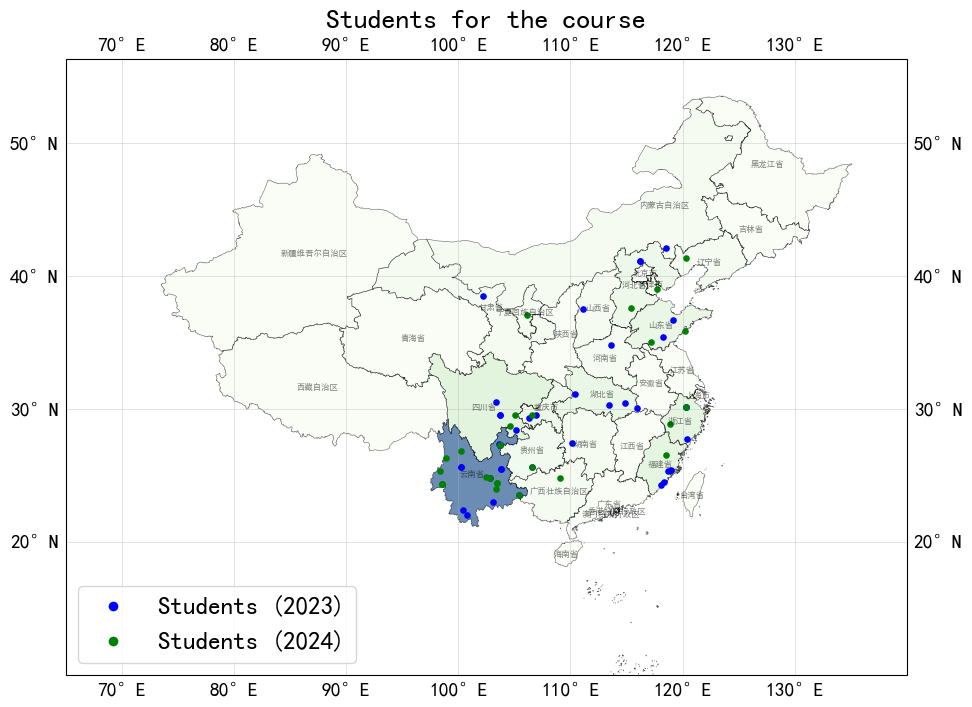

In [46]:
geo_province_centers = china_province.geometry.representative_point()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65, 140, 10, 50])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
# ax.stock_img()
# china_province.plot(ax = ax, facecolor='None', edgecolor='black', lw=0.5)
china_province.plot(ax=ax, column='num_students_all', cmap='GnBu', edgecolor='black', alpha=0.6,\
           legend=False, linewidth=0.4, legend_kwds={'label': 'Number of students', 'shrink':0.7})
students_2023.plot(ax=ax, edgecolor='blue', facecolor='blue', markersize=14)
students_2024.plot(ax=ax, edgecolor='green', facecolor='green', markersize=14)

plt.rcParams['font.family'] = 'SimHei' 
for x, y, label in zip(geo_province_centers.x, geo_province_centers.y, china_province['pr_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center', alpha=0.5, transform=ccrs.PlateCarree())
legend_patches = [
  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Students (2023)'),
  Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Students (2024)'),
  ]
ax.legend(handles=legend_patches, loc='lower left', fontsize=18)
ax.set_title('Students for the course', fontsize=20)
# plt.savefig('students/figs/distibution_students.png', bbox_inches='tight', dpi=100)


In [ ]:

num_boy_2023 = students_2023[students_2023['Gender'] == 'boy'].shape[0]
num_girl_2023 = students_2023[students_2023['Gender'] == 'girl'].shape[0]
num_boy_2024 = students_2024[students_2024['Gender'] == 'boy'].shape[0]
num_girl_2024 = students_2024[students_2024['Gender'] == 'girl'].shape[0]

data = {
    'Year': ['2023', '2024'],
    'Boys': [num_boy_2023, num_boy_2024],
    'Girls': [num_girl_2023, num_girl_2024]}
df_gender = pd.DataFrame(data)


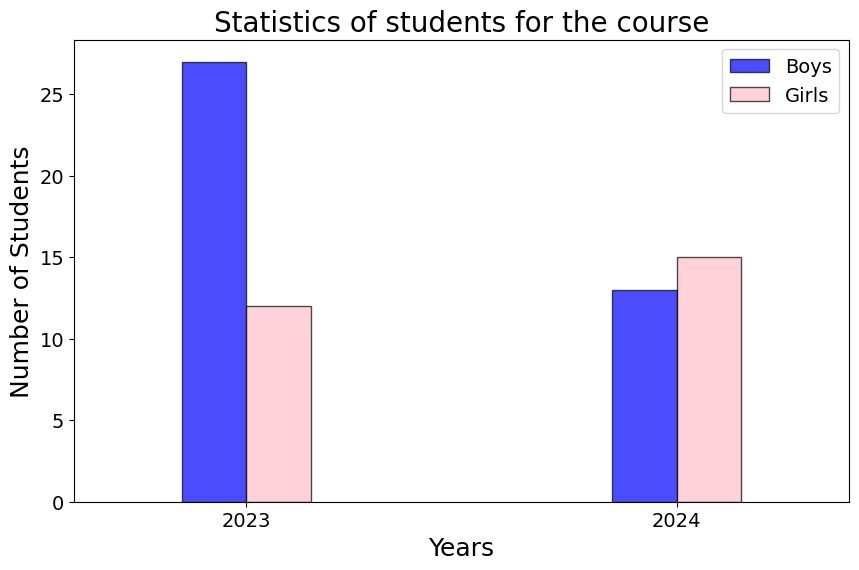

In [37]:
plt.rcParams.update({'font.size': 14})
df_gender['Total'] = df_gender['Boys'] + df_gender['Girls']
fig, ax = plt.subplots(figsize=(10, 6))
df_gender.plot(kind='bar', x='Year', y=['Boys', 'Girls'], 
               ax=ax, color=['blue', 'pink'], alpha=0.7, 
               edgecolor='black', linewidth=1, width=0.3)
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Number of Students', fontsize=18)
ax.set_title('Statistics of students for the course', fontsize=20)
# plt.savefig('students/figs/stats_students.png', bbox_inches='tight', dpi=100)


[27, 27]